# Import libraries

In [6]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import DBSCAN
from sklearn.cluster import MiniBatchKMeans
from sklearn.mixture import GaussianMixture
from scipy import stats
from scipy.stats import norm, skew
from sklearn.impute import KNNImputer
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Read data

In [7]:
data=pd.read_csv('CC GENERAL.csv')
data.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


**data information**

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

**drop ID**

In [9]:
data.drop('CUST_ID',axis=1,inplace=True)

**Statistics Information from std we can observe alot of skewness in the data**

In [10]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


**sum of missing values**

In [11]:
data.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

**check correlation**

<AxesSubplot:>

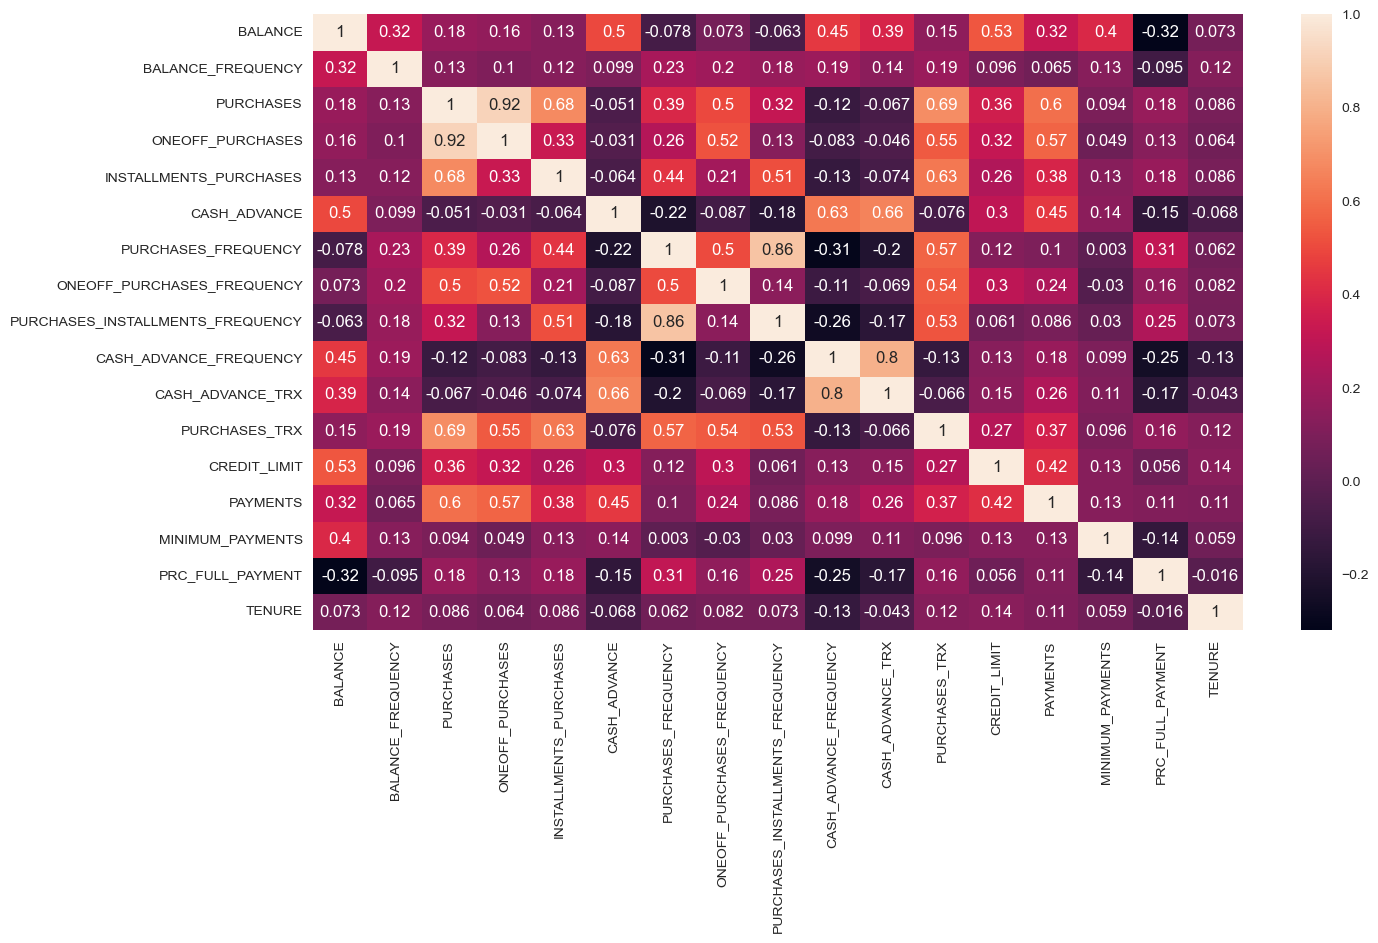

In [12]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True)

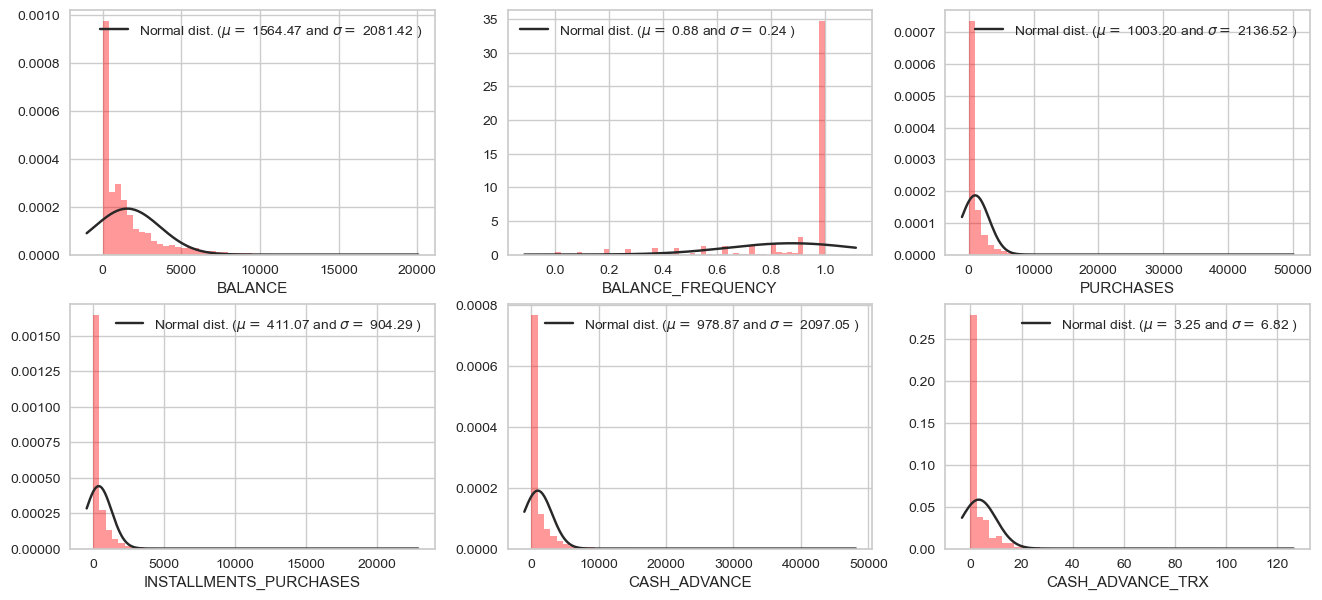

In [13]:
list_col=['BALANCE','BALANCE_FREQUENCY','PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','CASH_ADVANCE_TRX']
fig,ax=plt.subplots(figsize=(16,7))
for i,j in enumerate(list_col):
    plt.subplot(2,3,i+1)
    sns.distplot(data[j],fit=norm,kde=False,color='red')
    (mu, sigma) = norm.fit(data[j])
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.show()

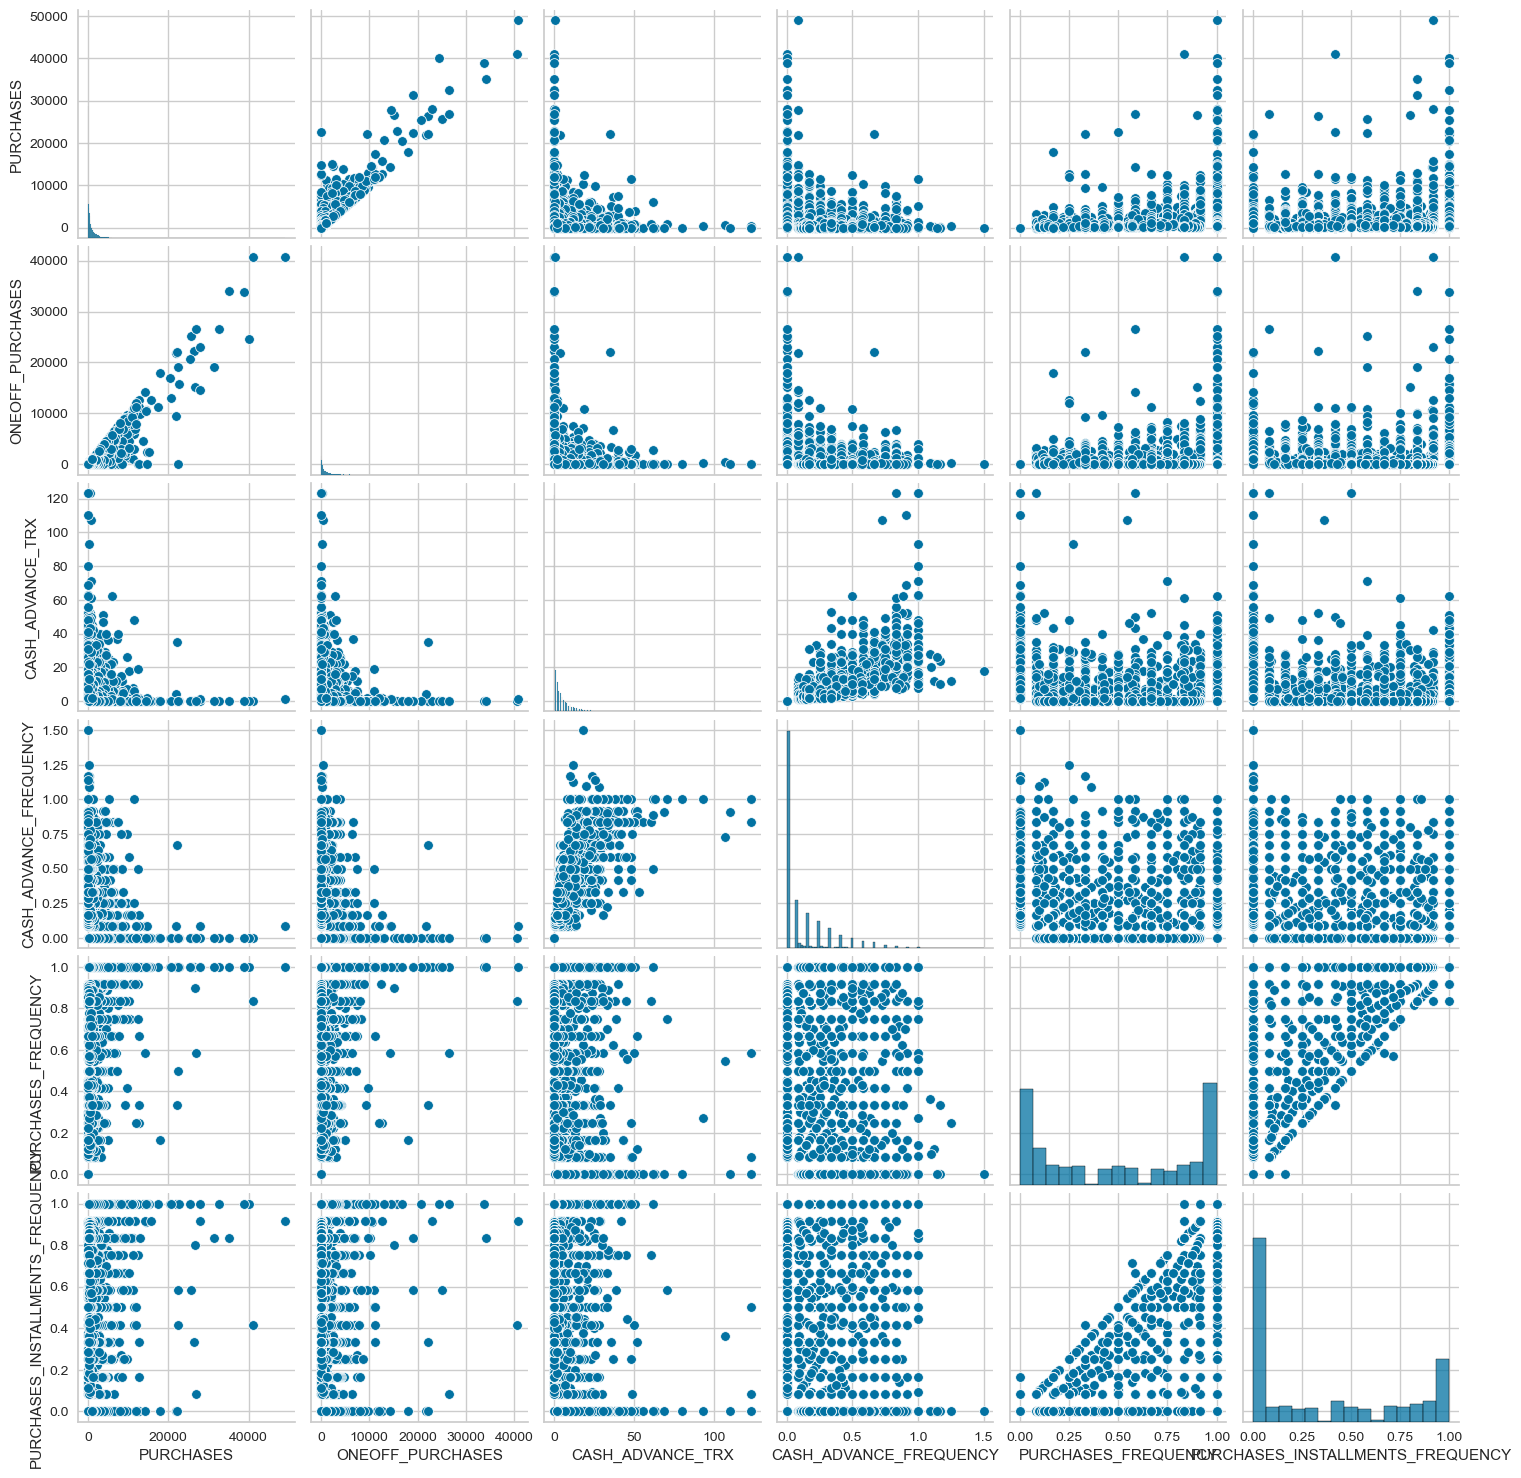

In [14]:
sns.pairplot(data,
    x_vars=['PURCHASES','ONEOFF_PURCHASES','CASH_ADVANCE_TRX','CASH_ADVANCE_FREQUENCY','PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY'],
    y_vars=['PURCHASES','ONEOFF_PURCHASES','CASH_ADVANCE_TRX','CASH_ADVANCE_FREQUENCY','PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY']
             ,diag_kind='hist',diag_kws=dict(multiple="stack"))

**fill missing values**

In [15]:
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].median(),inplace=True)

In [16]:
missing=data[data['MINIMUM_PAYMENTS'].isnull()]

In [17]:
missing.shape

(313, 17)

In [18]:
data.dropna(inplace=True)

In [19]:
data.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

**create a model that predict with MINIMUM_PAYMENTS to fill the missing values**

In [20]:
X=data.drop('MINIMUM_PAYMENTS',axis=1)
y=data['MINIMUM_PAYMENTS']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15,random_state=0)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [23]:
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators=300)
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=300, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [24]:
y_pred=model.predict(X_test)

In [25]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))  
rmse

1333.1578569953501

In [26]:
mean_absolute_error(y_test,y_pred)

468.05615122727517

In [27]:
r2_score(y_test,y_pred)

0.6132111020485707

In [28]:
missing.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,1666.670542,0.636364,1499.0,1499.0,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,2242.311686,1.000000,437.0,97.0,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,3910.111237,1.000000,0.0,0.0,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,6.660517,0.636364,310.0,0.0,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,1311.995984,1.000000,1283.9,1283.9,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12


In [29]:
y_test2=missing.drop('MINIMUM_PAYMENTS',axis=1)

**predict with missing values**

In [30]:
y_pred2=model.predict(y_test2)

In [31]:
y_pred2.shape

(313,)

In [32]:
df=pd.DataFrame(y_pred2, columns =['MINIMUM_PAYMENTS']).reset_index(drop=True)

In [33]:
df.head()

,MINIMUM_PAYMENTS
0,6885.487305
1,8604.613281
2,13613.959961
3,6615.916016
4,6247.962891


In [34]:
y_test2=y_test2.reset_index(drop=True)

In [35]:
y_test2.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1666.670542,0.636364,1499.0,1499.0,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.0,12
1,2242.311686,1.000000,437.0,97.0,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,0.0,12
2,3910.111237,1.000000,0.0,0.0,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,0.0,12
3,6.660517,0.636364,310.0,0.0,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,0.0,12
4,1311.995984,1.000000,1283.9,1283.9,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,0.0,12


In [36]:
fill_missing=pd.concat([y_test2,df],axis=1)

In [37]:
df=pd.concat([data,fill_missing],axis=0)

**Clean data from missing values**

In [38]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


In [39]:
df.shape

(8950, 17)

In [40]:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

**check Outliers**

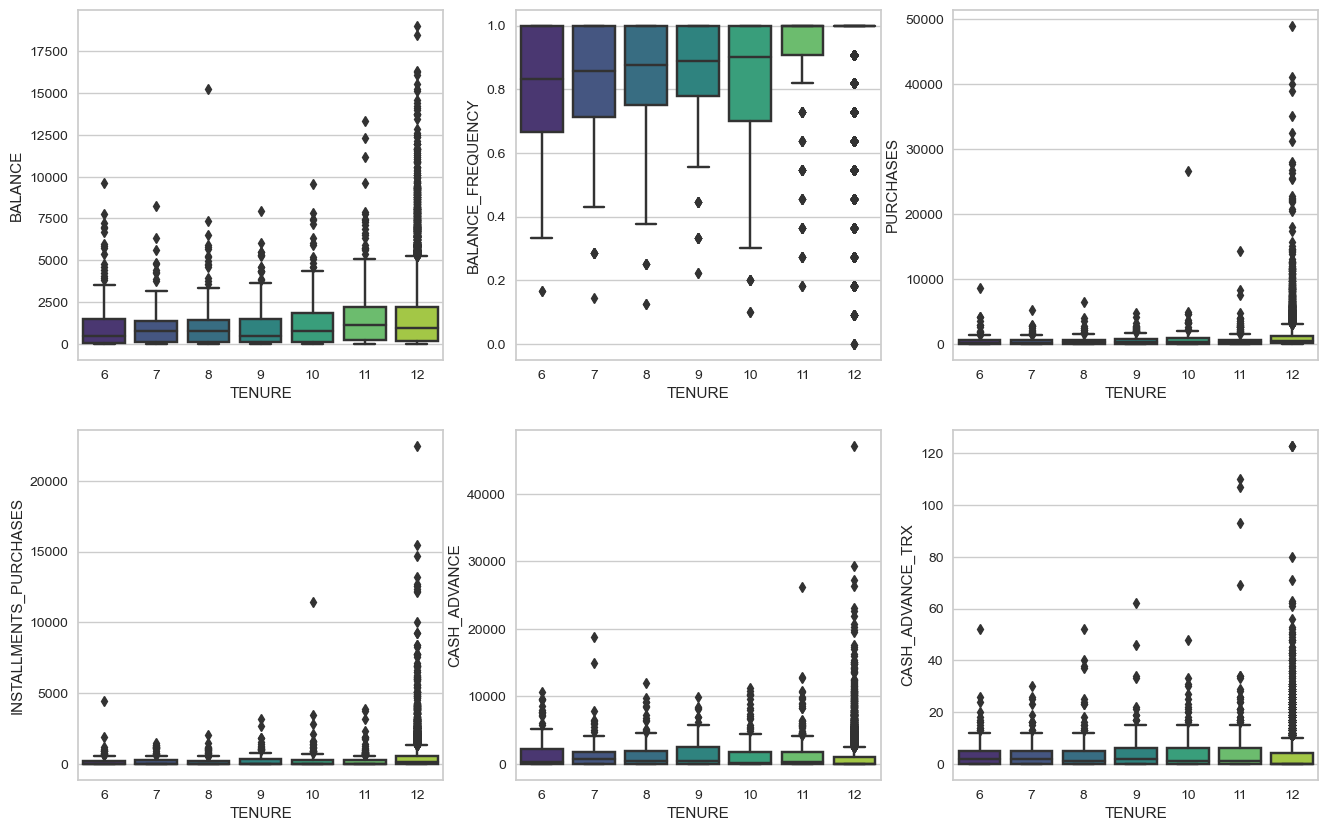

In [41]:
list_col=['BALANCE','BALANCE_FREQUENCY','PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','CASH_ADVANCE_TRX']
fig,ax=plt.subplots(figsize=(16,10))
for i,j in enumerate(list_col):
    plt.subplot(2,3,i+1)
    sns.boxplot(x=data['TENURE'], y=data[j],palette="viridis")
plt.show()

**Percentage of outliers in every column**

In [42]:
def outlier_percent(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    minimum = Q1 - (1.5 * IQR)
    maximum = Q3 + (1.5 * IQR)
    num_outliers =  np.sum((data < minimum) |(data > maximum))
    num_total = data.count()
    return (num_outliers/num_total)*100

In [43]:
for column in df.columns:
    data = df[column]
    percent = str(round(outlier_percent(data), 2))
    print(f'Outliers in "{column}": {percent}%')

Outliers in "BALANCE": 7.77%
Outliers in "BALANCE_FREQUENCY": 16.68%
Outliers in "PURCHASES": 9.03%
Outliers in "ONEOFF_PURCHASES": 11.32%
Outliers in "INSTALLMENTS_PURCHASES": 9.69%
Outliers in "CASH_ADVANCE": 11.51%
Outliers in "PURCHASES_FREQUENCY": 0.0%
Outliers in "ONEOFF_PURCHASES_FREQUENCY": 8.74%
Outliers in "PURCHASES_INSTALLMENTS_FREQUENCY": 0.0%
Outliers in "CASH_ADVANCE_FREQUENCY": 5.87%
Outliers in "CASH_ADVANCE_TRX": 8.98%
Outliers in "PURCHASES_TRX": 8.56%
Outliers in "CREDIT_LIMIT": 2.77%
Outliers in "PAYMENTS": 9.03%
Outliers in "MINIMUM_PAYMENTS": 10.31%
Outliers in "PRC_FULL_PAYMENT": 16.47%
Outliers in "TENURE": 15.26%


**Replace Outliers with np.nan**

In [44]:
for column in df.columns:
    data = df[column]
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    minimum = Q1 - (1.5 * IQR)
    maximum = Q3 + (1.5 * IQR)
 
    outliers = ((data < minimum) |(data > maximum))
    df[column].loc[outliers] = np.nan
    
df.isna().sum()

BALANCE                              695
BALANCE_FREQUENCY                   1493
PURCHASES                            808
ONEOFF_PURCHASES                    1013
INSTALLMENTS_PURCHASES               867
CASH_ADVANCE                        1030
PURCHASES_FREQUENCY                    0
ONEOFF_PURCHASES_FREQUENCY           782
PURCHASES_INSTALLMENTS_FREQUENCY       0
CASH_ADVANCE_FREQUENCY               525
CASH_ADVANCE_TRX                     804
PURCHASES_TRX                        766
CREDIT_LIMIT                         248
PAYMENTS                             808
MINIMUM_PAYMENTS                     923
PRC_FULL_PAYMENT                    1474
TENURE                              1366
dtype: int64

**KNN imputer: Each sample’s missing values are imputed using the mean value from n_neighbors nearest neighbors found in the training set.**

In [45]:
imputer = KNNImputer()
imp_data = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
imp_data.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [46]:
imp_data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.0
mean,1244.528805,0.977840,607.868601,230.596391,225.567318,452.686169,0.490351,0.168858,0.364437,0.105195,1.753184,10.365363,4283.557333,1202.416151,559.645417,0.031670,12.0
std,1286.373690,0.060318,669.554270,344.804300,286.046304,696.680299,0.401371,0.226916,0.397448,0.140643,2.570302,10.712363,3099.924040,1014.028327,507.891601,0.070107,0.0
min,0.000000,0.727273,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,12.0
25%,128.194895,1.000000,39.550000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.803012,0.000000,12.0
50%,868.771066,1.000000,359.340000,27.985000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.127278,332.843491,0.000000,12.0
75%,1967.200467,1.000000,994.855000,353.938500,384.943000,823.156798,0.916667,0.266667,0.750000,0.166667,3.000000,17.000000,6375.000000,1878.807169,875.384052,0.016667,12.0
max,4940.113918,1.000000,2711.900000,1443.330000,1170.490000,2784.294727,1.000000,0.750000,1.000000,0.545455,10.000000,41.000000,13600.000000,4177.324826,2071.432892,0.333333,12.0


In [47]:
std_imp_data = pd.DataFrame(StandardScaler().fit_transform(imp_data), columns=imp_data.columns)
std_imp_data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8950.0
mean,-5.965681e-16,6.079618e-15,-3.565900e-15,3.013865e-15,7.878676e-16,5.422602e-16,-1.458399e-15,-1.046011e-14,-1.331920e-15,-3.750445e-16,8.720523e-16,2.922399e-15,-1.840192e-15,5.117570e-16,-2.931237e-16,-1.968506e-16,0.0
std,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,0.0
min,-9.675247e-01,-4.154313e+00,-9.079213e-01,-6.688121e-01,-7.886133e-01,-6.498123e-01,-1.221758e+00,-7.441852e-01,-9.169952e-01,-7.479983e-01,-6.821308e-01,-9.676616e-01,-1.365773e+00,-1.185848e+00,-1.101923e+00,-4.517649e-01,0.0
25%,-8.678631e-01,3.674058e-01,-8.488488e-01,-6.688121e-01,-7.886133e-01,-6.498123e-01,-1.014125e+00,-7.441852e-01,-9.169952e-01,-7.479983e-01,-6.821308e-01,-8.743063e-01,-8.657332e-01,-8.078529e-01,-7.656439e-01,-4.517649e-01,0.0
50%,-2.921225e-01,3.674058e-01,-3.712059e-01,-5.876455e-01,-4.774575e-01,-6.498123e-01,2.404259e-02,-3.769230e-01,-4.976286e-01,-7.479983e-01,-6.821308e-01,-3.141745e-01,-4.140840e-01,-3.415173e-01,-4.465807e-01,-4.517649e-01,0.0
75%,5.618212e-01,3.674058e-01,5.780084e-01,3.577363e-01,5.571986e-01,5.317953e-01,1.062211e+00,4.310581e-01,9.701506e-01,4.371004e-01,4.851124e-01,6.193785e-01,6.747132e-01,6.670709e-01,6.217001e-01,-2.140205e-01,0.0
max,2.873031e+00,3.674058e-01,3.142612e+00,3.517361e+00,3.303575e+00,3.346928e+00,1.269843e+00,2.561187e+00,1.599199e+00,3.130502e+00,3.208680e+00,2.859906e+00,3.005546e+00,2.933917e+00,2.976761e+00,4.303137e+00,0.0


In [48]:
for column in std_imp_data.columns:
    data =std_imp_data[column]
    percent = str(round(outlier_percent(data), 2))
    print(f'Outliers in "{column}": {percent}%')

Outliers in "BALANCE": 0.7%
Outliers in "BALANCE_FREQUENCY": 14.13%
Outliers in "PURCHASES": 1.75%
Outliers in "ONEOFF_PURCHASES": 7.89%
Outliers in "INSTALLMENTS_PURCHASES": 2.94%
Outliers in "CASH_ADVANCE": 4.7%
Outliers in "PURCHASES_FREQUENCY": 0.0%
Outliers in "ONEOFF_PURCHASES_FREQUENCY": 4.94%
Outliers in "PURCHASES_INSTALLMENTS_FREQUENCY": 0.0%
Outliers in "CASH_ADVANCE_FREQUENCY": 3.09%
Outliers in "CASH_ADVANCE_TRX": 5.06%
Outliers in "PURCHASES_TRX": 0.0%
Outliers in "CREDIT_LIMIT": 0.02%
Outliers in "PAYMENTS": 0.15%
Outliers in "MINIMUM_PAYMENTS": 0.91%
Outliers in "PRC_FULL_PAYMENT": 19.2%
Outliers in "TENURE": 0.0%


In [49]:
pca = PCA(n_components=0.9, random_state=42)
pca.fit(std_imp_data)
PC_names = ['PC'+str(x) for x in range(1,len(pca.components_)+1)]
pca_data = pd.DataFrame(pca.transform(std_imp_data), columns=PC_names)

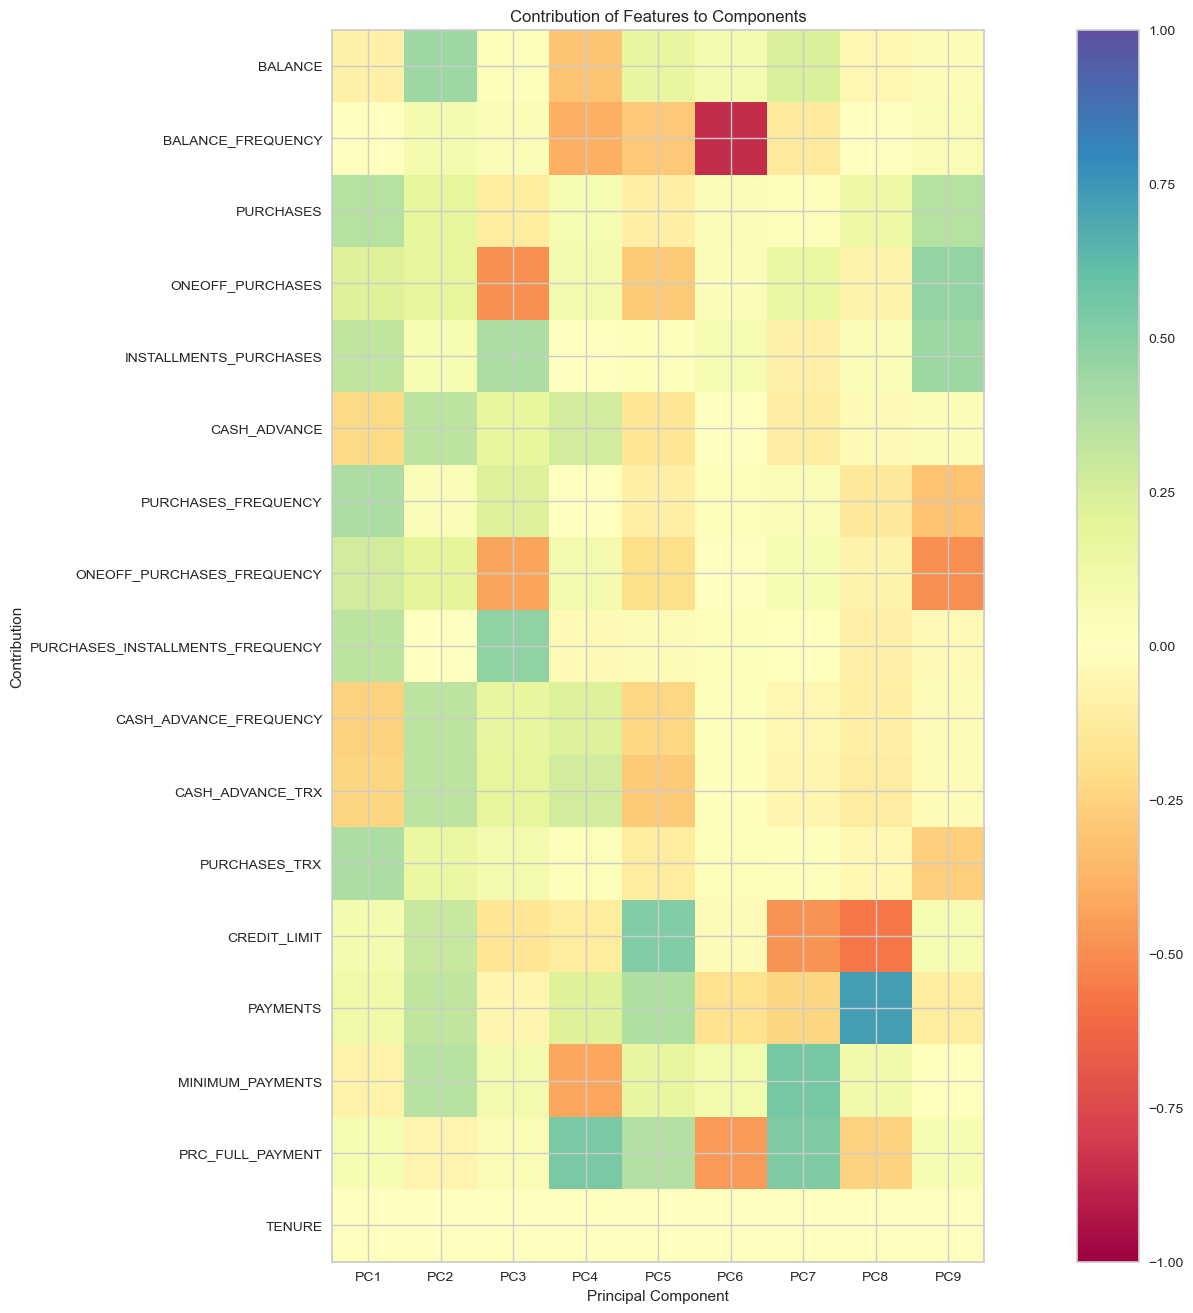

In [50]:
fig, ax = plt.subplots(figsize=(24, 16))
plt.imshow(pca.components_.T,
           cmap="Spectral",
           vmin=-1,
           vmax=1,
          )
plt.yticks(range(len(std_imp_data.columns)), std_imp_data.columns)
plt.xticks(range(len(pca_data.columns)), pca_data.columns)
plt.xlabel("Principal Component")
plt.ylabel("Contribution")
plt.title("Contribution of Features to Components")
plt.colorbar()

# Kmeans Model 

In [51]:
inertia=[]
silhouette=[]
for k in range (2,20):
    kmeans = KMeans(n_clusters=k,random_state=0)
    y_pred = kmeans.fit_predict(pca_data)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(pca_data, kmeans.labels_))

Text(0.5, 1.0, 'K Elbow Method')

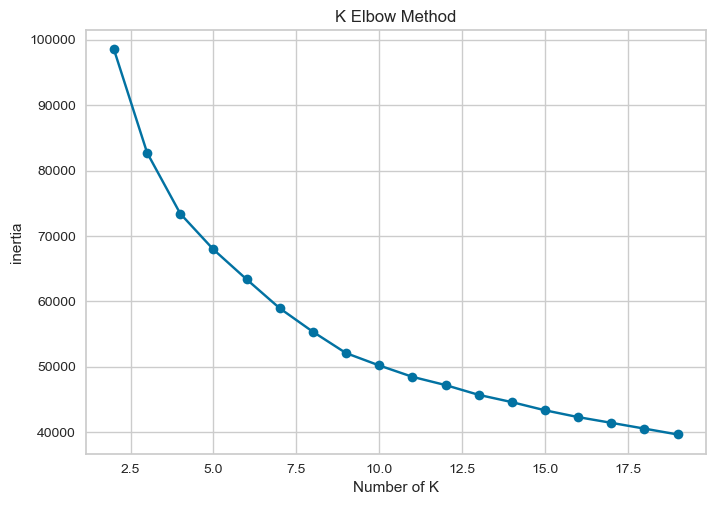

In [52]:
plt.plot(range (2,20),inertia,'o-')
plt.xlabel("Number of K")
plt.ylabel("inertia")
plt.title('K Elbow Method')

Text(0, 0.5, 'silhouette Score')

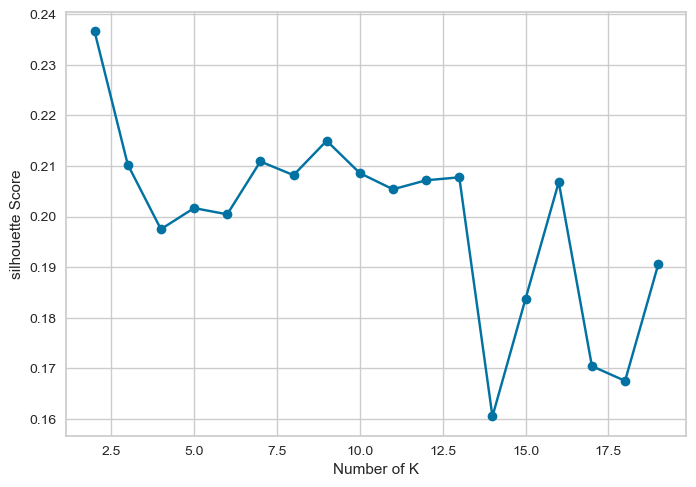

In [53]:
plt.plot(range (2,20),silhouette,'o-')
plt.xlabel("Number of K")
plt.ylabel("silhouette Score")

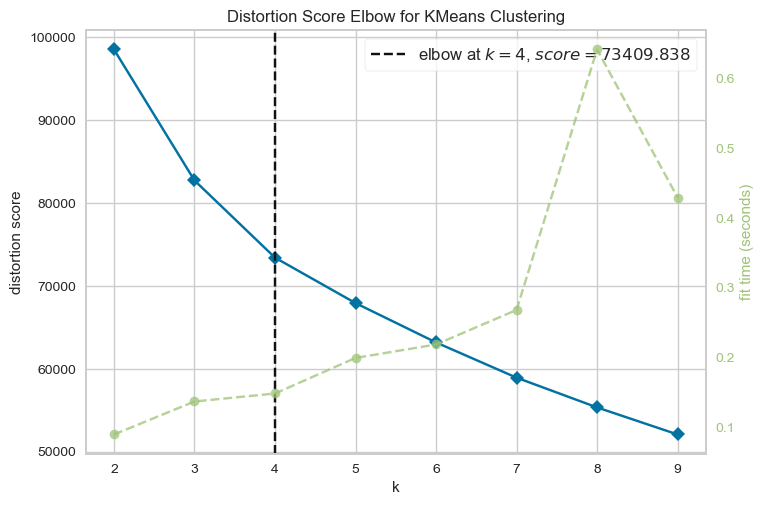

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [54]:
model = KMeans(random_state=42)
distortion_visualizer = KElbowVisualizer(model, k=(2,10))
distortion_visualizer.fit(pca_data)       
distortion_visualizer.show() 

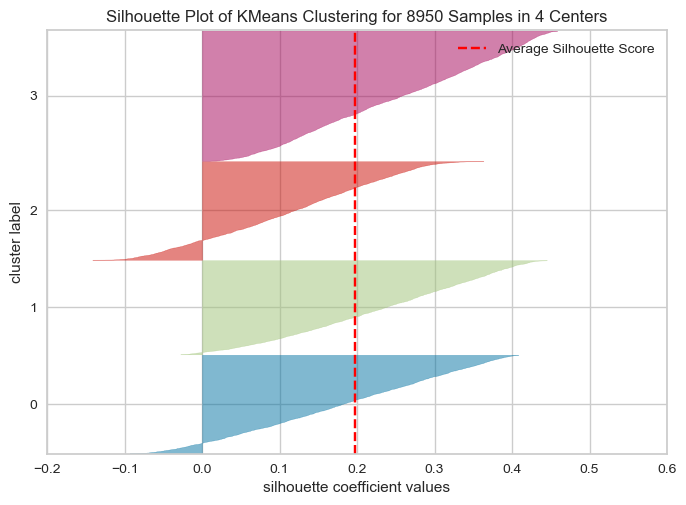

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 8950 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [55]:
# Instantiate the clustering model and visualizer
model = KMeans(4,random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(pca_data)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

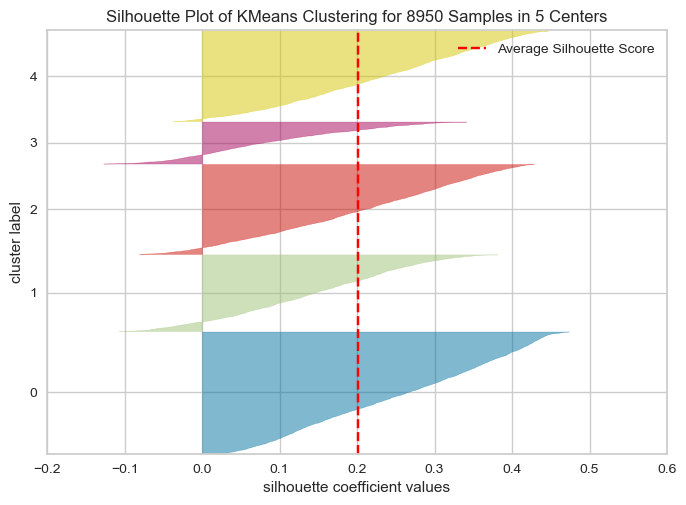

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 8950 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [56]:
# Instantiate the clustering model and visualizer
model = KMeans(5,random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(pca_data)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [57]:
km_model = KMeans(distortion_visualizer.elbow_value_, random_state=42)
labels = km_model.fit_predict(pca_data)

In [58]:
labels                                  

array([3, 0, 2, ..., 1, 3, 1])

# MiniBatchKMeans

In [59]:
inertia=[]
silhouette=[]
for k in range (2,20):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    minibatch_kmeans.fit(pca_data)
    inertia.append(minibatch_kmeans.inertia_)
    silhouette.append(silhouette_score(pca_data, minibatch_kmeans.labels_))

Text(0.5, 1.0, 'K Elbow Method')

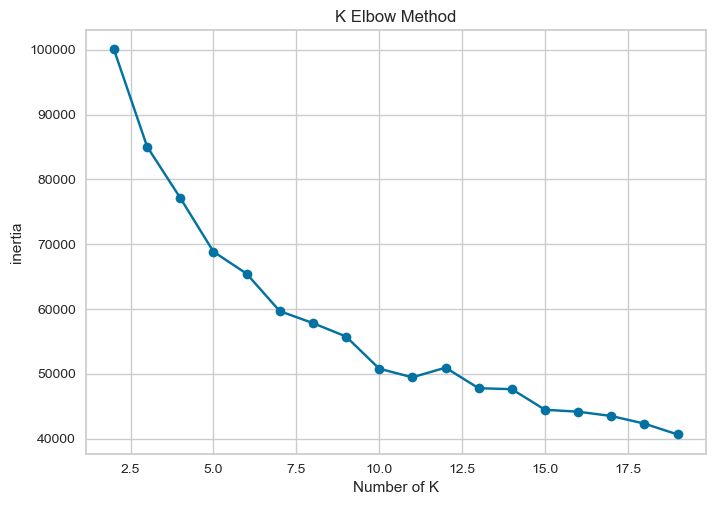

In [60]:
plt.plot(range (2,20),inertia,'o-',)
plt.xlabel("Number of K")
plt.ylabel("inertia")
plt.title('K Elbow Method')

Text(0, 0.5, 'silhouette Score')

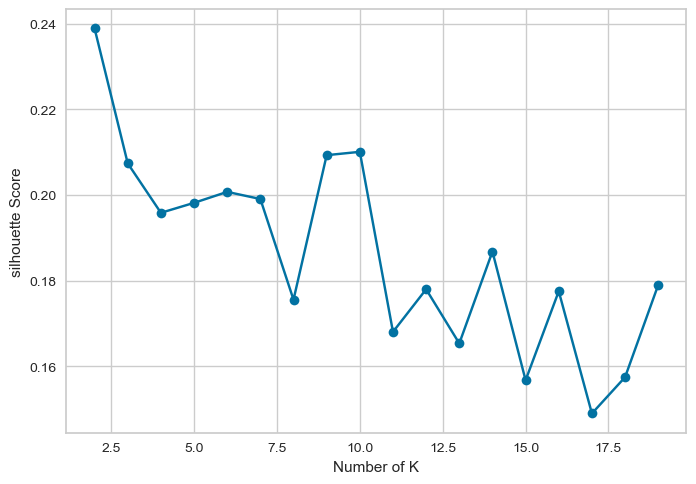

In [61]:
plt.plot(range (2,20),silhouette,'o-')
plt.xlabel("Number of K")
plt.ylabel("silhouette Score")

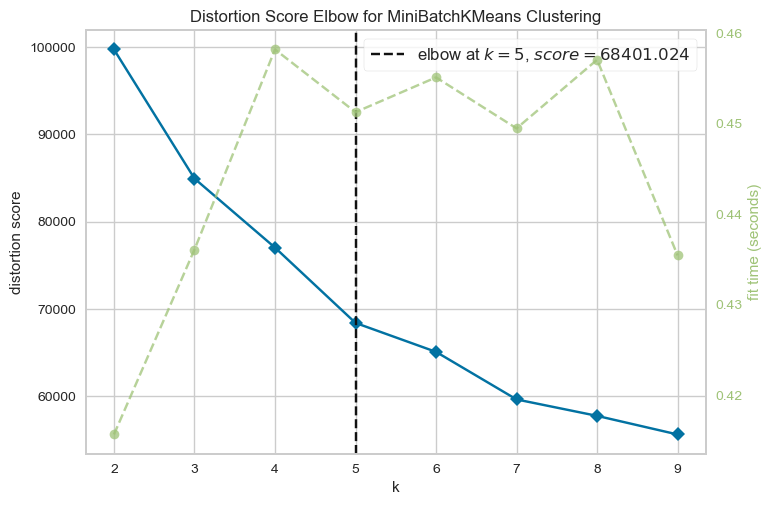

<AxesSubplot:title={'center':'Distortion Score Elbow for MiniBatchKMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [62]:
model = MiniBatchKMeans(random_state=42)
distortion_visualizer = KElbowVisualizer(model, k=(2,10))
distortion_visualizer.fit(pca_data)       
distortion_visualizer.show() 

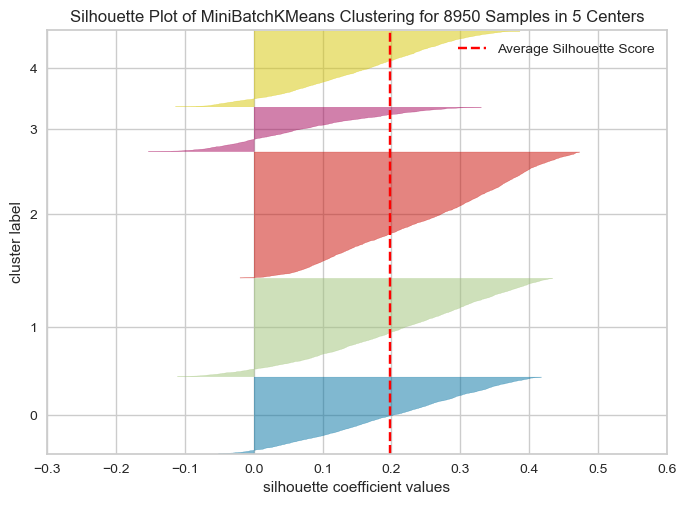

<AxesSubplot:title={'center':'Silhouette Plot of MiniBatchKMeans Clustering for 8950 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [63]:
# Instantiate the clustering model and visualizer
model = MiniBatchKMeans(5,random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(pca_data)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

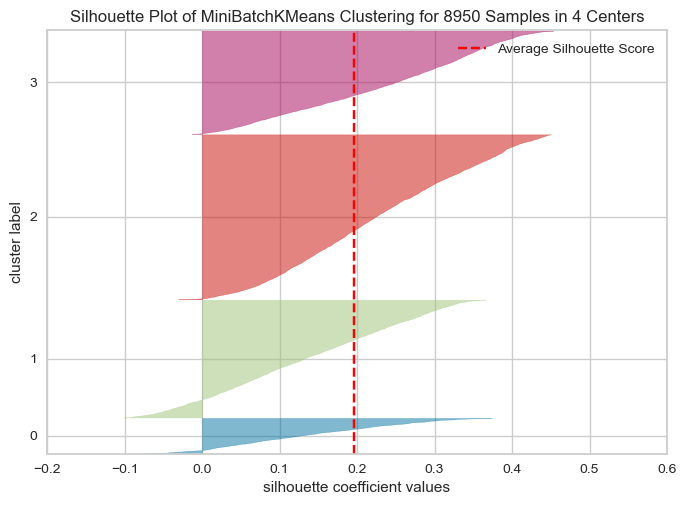

<AxesSubplot:title={'center':'Silhouette Plot of MiniBatchKMeans Clustering for 8950 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [64]:
# Instantiate the clustering model and visualizer
model = MiniBatchKMeans(4,random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(pca_data)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

# GaussianMixture Model

In [65]:
BIC=[]
AIC=[]
for k in range (2,10):
    gm = GaussianMixture(n_components=k, n_init=10)
    gm.fit(pca_data)
    BIC.append(gm.bic(pca_data))
    AIC.append(gm.aic(pca_data))

Text(0, 0.5, 'Bayesian information criterion (BIC)')

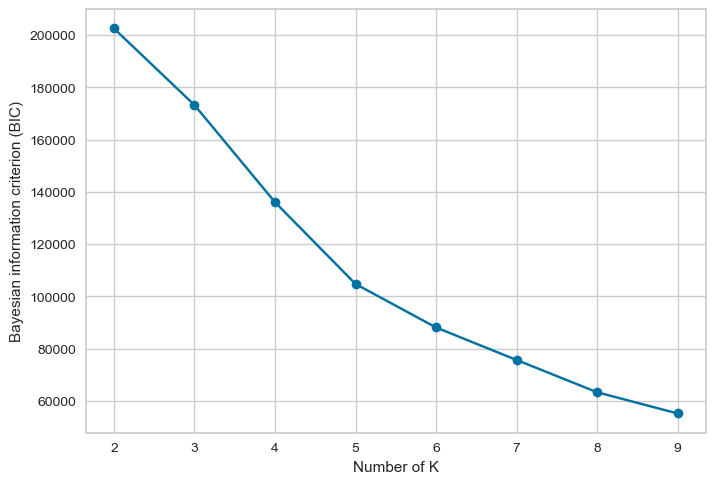

In [66]:
plt.plot(range (2,10),BIC,'o-')
plt.xlabel("Number of K")
plt.ylabel("Bayesian information criterion (BIC)")

Text(0, 0.5, 'Akaike information criterion')

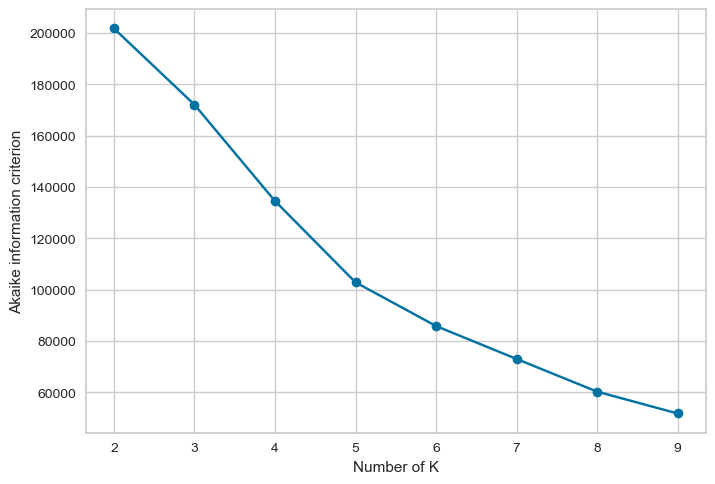

In [67]:
plt.plot(range (2,10),AIC,'o-')
plt.xlabel("Number of K")
plt.ylabel("Akaike information criterion")

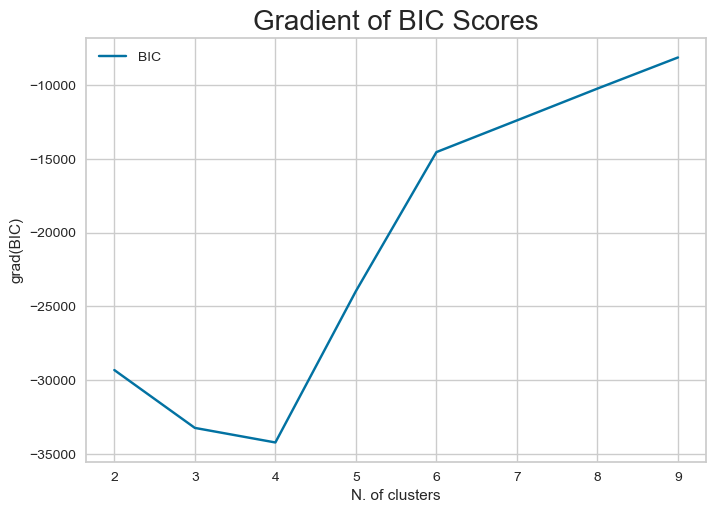

In [68]:
plt.errorbar(range (2,10), np.gradient(BIC), label='BIC')
plt.title("Gradient of BIC Scores", fontsize=20)
plt.xticks(range (2,10))
plt.xlabel("N. of clusters")
plt.ylabel("grad(BIC)")
plt.legend()

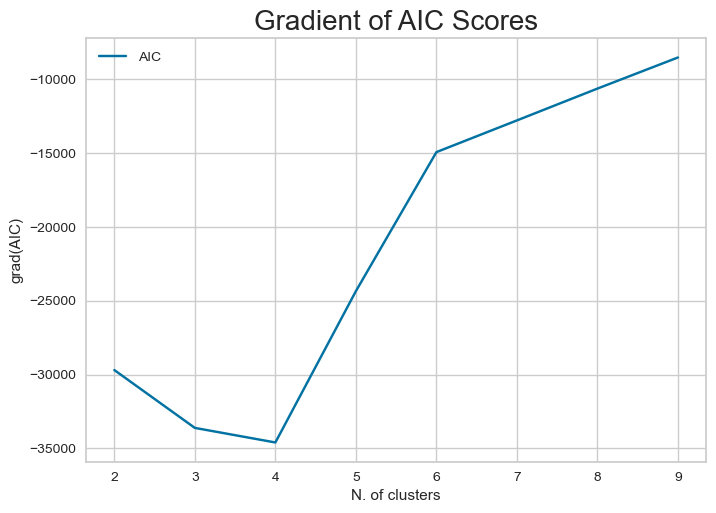

In [69]:
plt.errorbar(range (2,10), np.gradient(AIC), label='AIC')
plt.title("Gradient of AIC Scores", fontsize=20)
plt.xticks(range (2,10))
plt.xlabel("N. of clusters")
plt.ylabel("grad(AIC)")
plt.legend()

# BayesianGaussianMixture

In [70]:
from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components=10, n_init=10,random_state=42)
bgm.fit(pca_data)
bgm.weights_.round(3)

array([0.048, 0.06 , 0.116, 0.164, 0.108, 0.172, 0.064, 0.062, 0.064,
       0.142])

# AgglomerativeClustering

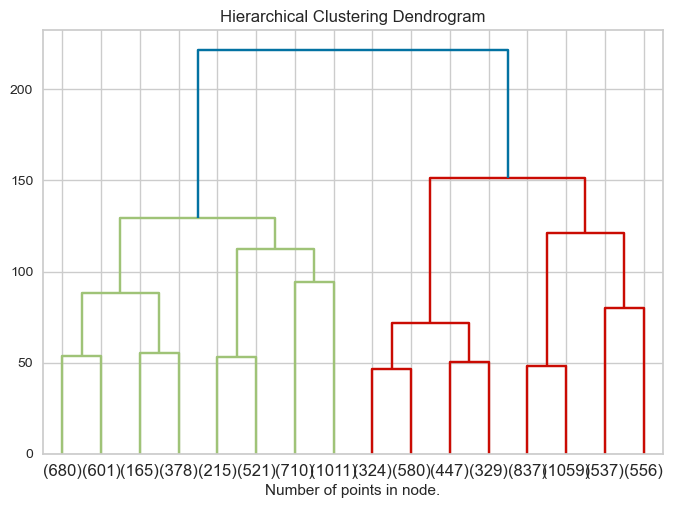

In [71]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(pca_data)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node.")
plt.show()

# ADD Labels to the data

In [72]:
pca_data['Target'] = labels

In [73]:
pca_data.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,Target
0,-1.245844,-2.808171,-0.379408,0.596812,0.470579,2.347486,0.140444,0.321529,-0.000934,3
1,-2.444730,2.220346,0.004620,2.080877,3.336355,-0.752615,1.029558,0.919958,-0.179944,0
2,1.400263,0.711622,-2.604003,-1.133361,-0.351285,0.064328,0.325340,-1.151756,-0.866578,2
3,-1.469788,-2.040539,-0.710040,-0.714186,-0.121610,-0.294833,-0.085630,0.610349,-0.175482,3
4,0.951148,-0.020292,1.240842,-1.708677,0.421168,0.185728,1.045871,1.243404,0.799377,1


In [74]:
imp_data['Target']= labels

In [75]:
imp_data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Target
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,3
1,3202.467416,0.909091,0.00,0.00,0.00,1068.127248,0.000000,0.000000,0.000000,0.25,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,0.650000,0.000000,0.00,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,2
3,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,3
4,1809.828751,1.000000,1333.28,0.00,565.61,0.000000,0.666667,0.000000,0.583333,0.00,0.0,8.0,1800.0,1400.057770,1447.860074,0.000000,12.0,1


# Clusters Analysis

<AxesSubplot:ylabel='Target'>

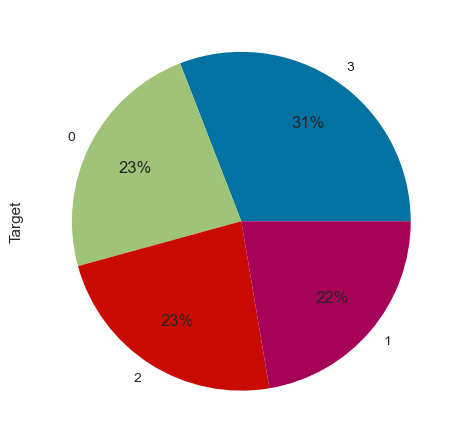

In [76]:
imp_data['Target'].value_counts().plot.pie(autopct='%1.0f%%', pctdistance=0.7, labeldistance=1.1)

In [77]:
def colorful_scatter(data):   
    LABEL_COLOR_MAP = {0 : 'y',1 : 'g',2 : 'm',3 : 'k'}
    sns.jointplot(data=data, x="BALANCE", y="PURCHASES", hue="Target", palette=LABEL_COLOR_MAP, alpha=0.6, height=10)

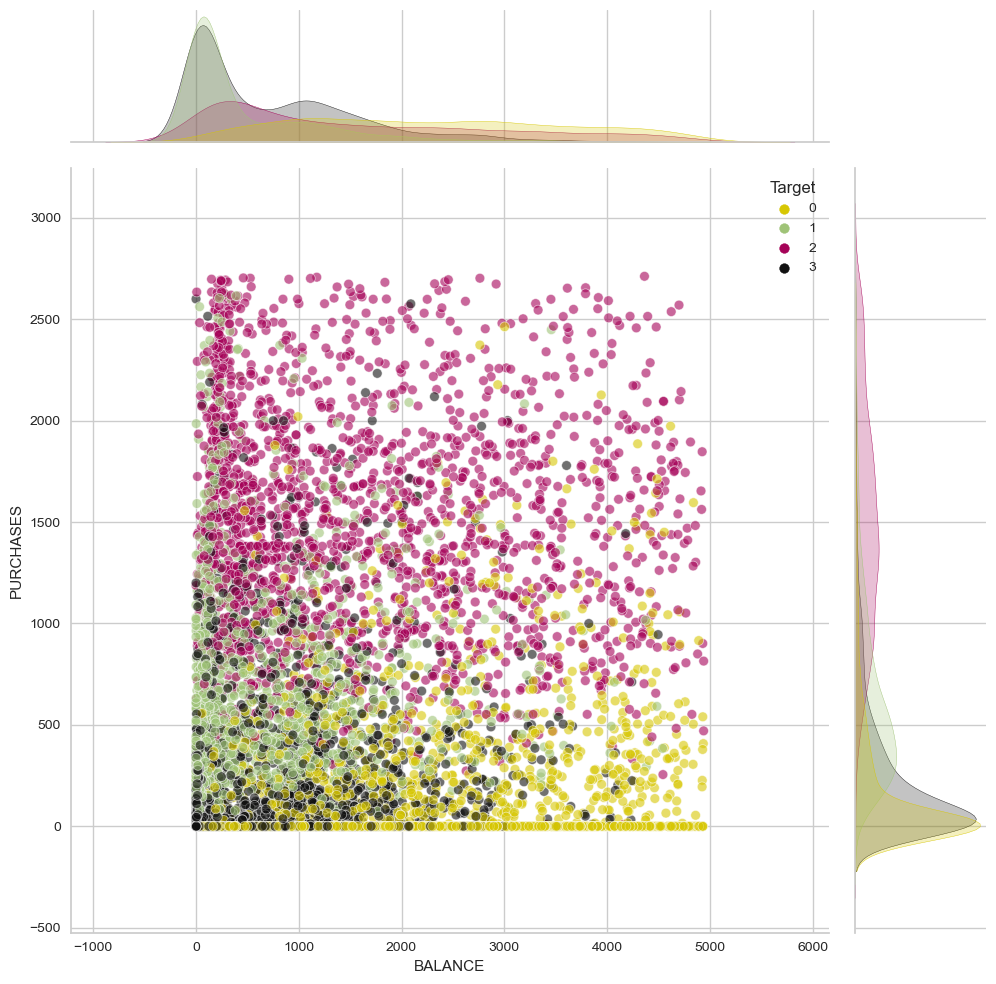

In [78]:
colorful_scatter(imp_data)

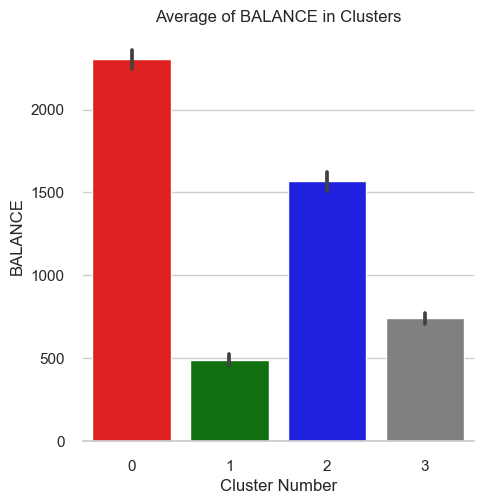

In [79]:
sns.set_theme(style="whitegrid")
g = sns.catplot(data=imp_data,kind="bar", x="Target",y='BALANCE', palette=['red','green','blue','gray'])
g.despine(left=True)
g.set_axis_labels("Cluster Number", "BALANCE")
plt.title("Average of BALANCE in Clusters")
plt.show()

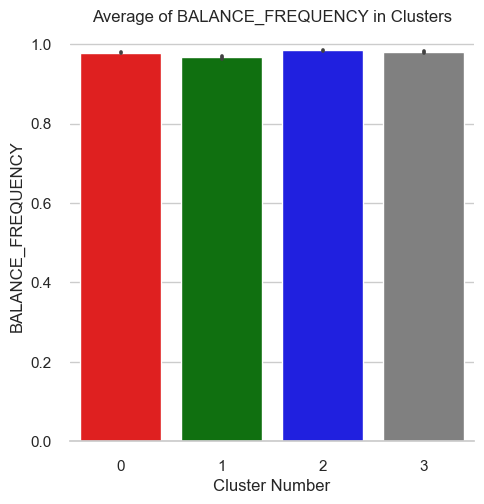

In [80]:
sns.set_theme(style="whitegrid")
g = sns.catplot(data=imp_data,kind="bar", x="Target",y='BALANCE_FREQUENCY', palette=['red','green','blue','gray'])
g.despine(left=True)
g.set_axis_labels("Cluster Number", "BALANCE_FREQUENCY")
plt.title("Average of BALANCE_FREQUENCY in Clusters")
plt.show()

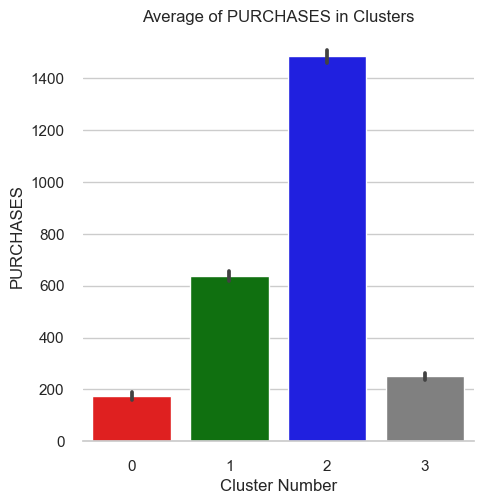

In [81]:
sns.set_theme(style="whitegrid")
g = sns.catplot(data=imp_data,kind="bar", x="Target",y='PURCHASES', palette=['red','green','blue','gray'])
g.despine(left=True)
g.set_axis_labels("Cluster Number", "PURCHASES")
plt.title("Average of PURCHASES in Clusters")
plt.show()

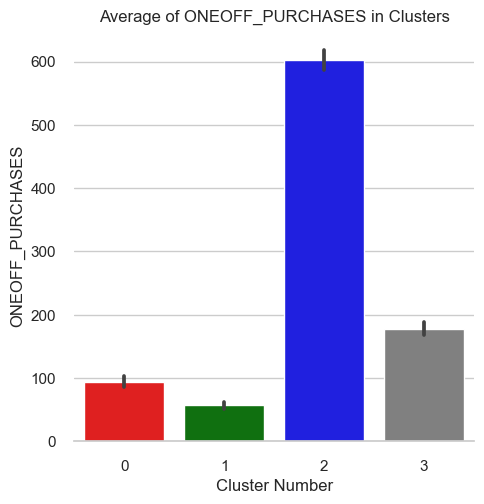

In [82]:
sns.set_theme(style="whitegrid")
g = sns.catplot(data=imp_data,kind="bar", x="Target",y='ONEOFF_PURCHASES', palette=['red','green','blue','gray'])
g.despine(left=True)
g.set_axis_labels("Cluster Number", "ONEOFF_PURCHASES")
plt.title("Average of ONEOFF_PURCHASES in Clusters")
plt.show()

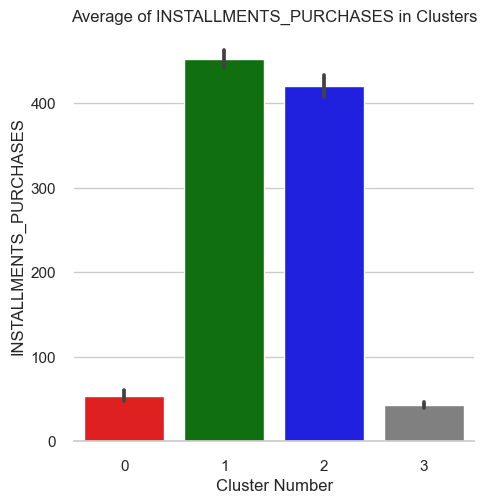

In [83]:
sns.set_theme(style="whitegrid")
g = sns.catplot(data=imp_data,kind="bar", x="Target",y='INSTALLMENTS_PURCHASES', palette=['red','green','blue','gray'])
g.despine(left=True)
g.set_axis_labels("Cluster Number", "INSTALLMENTS_PURCHASES")
plt.title("Average of INSTALLMENTS_PURCHASES in Clusters")
plt.show()

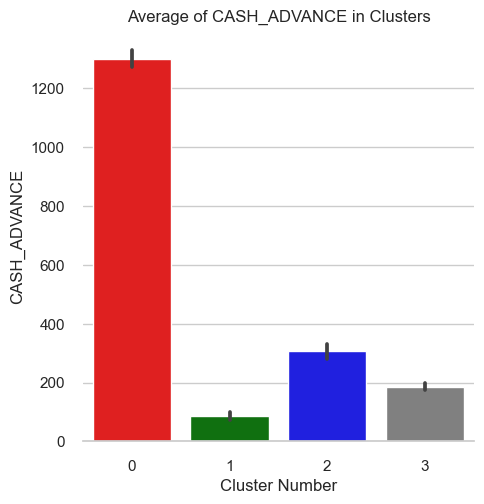

In [84]:
sns.set_theme(style="whitegrid")
g = sns.catplot(data=imp_data,kind="bar", x="Target",y='CASH_ADVANCE', palette=['red','green','blue','gray'])
g.despine(left=True)
g.set_axis_labels("Cluster Number", "CASH_ADVANCE")
plt.title("Average of CASH_ADVANCE in Clusters")
plt.show()

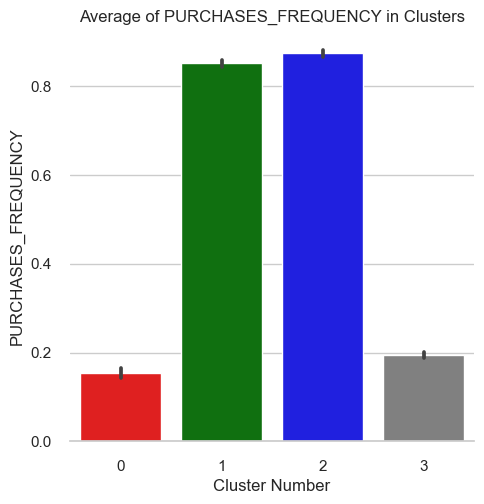

In [85]:
sns.set_theme(style="whitegrid")
g = sns.catplot(data=imp_data,kind="bar", x="Target",y='PURCHASES_FREQUENCY', palette=['red','green','blue','gray'])
g.despine(left=True)
g.set_axis_labels("Cluster Number", "PURCHASES_FREQUENCY")
plt.title("Average of PURCHASES_FREQUENCY in Clusters")
plt.show()

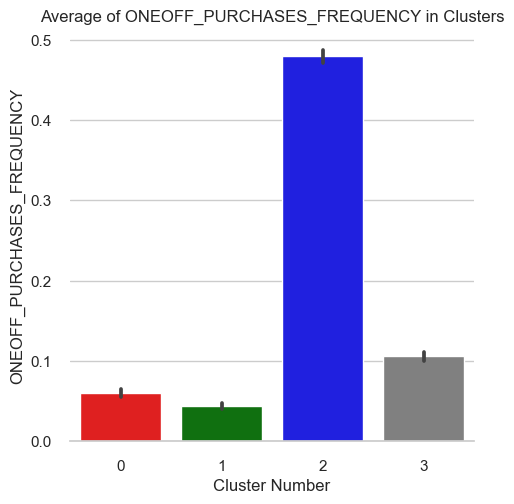

In [86]:
sns.set_theme(style="whitegrid")
g = sns.catplot(data=imp_data,kind="bar", x="Target",y='ONEOFF_PURCHASES_FREQUENCY', palette=['red','green','blue','gray'])
g.despine(left=True)
g.set_axis_labels("Cluster Number", "ONEOFF_PURCHASES_FREQUENCY")
plt.title("Average of ONEOFF_PURCHASES_FREQUENCY in Clusters")
plt.show()

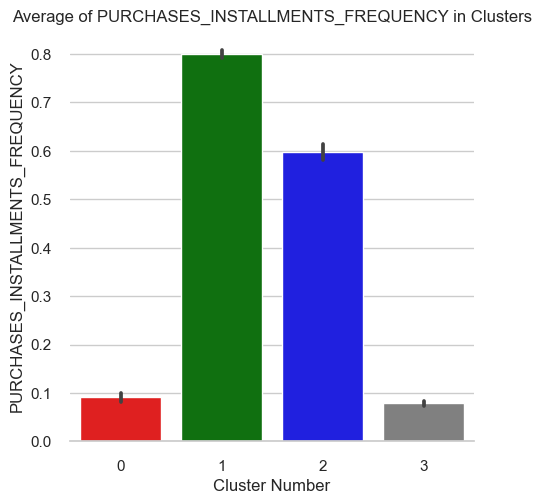

In [87]:
sns.set_theme(style="whitegrid")
g = sns.catplot(data=imp_data,kind="bar", x="Target",y='PURCHASES_INSTALLMENTS_FREQUENCY', palette=['red','green','blue','gray'])
g.despine(left=True)
g.set_axis_labels("Cluster Number", "PURCHASES_INSTALLMENTS_FREQUENCY")
plt.title("Average of PURCHASES_INSTALLMENTS_FREQUENCY in Clusters")
plt.show()

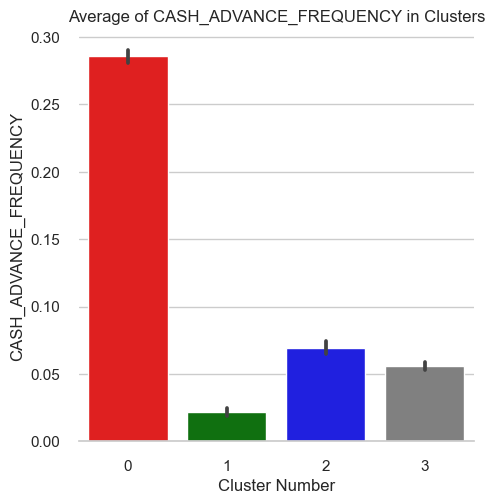

In [88]:
sns.set_theme(style="whitegrid")
g = sns.catplot(data=imp_data,kind="bar", x="Target",y='CASH_ADVANCE_FREQUENCY', palette=['red','green','blue','gray'])
g.despine(left=True)
g.set_axis_labels("Cluster Number", "CASH_ADVANCE_FREQUENCY")
plt.title("Average of CASH_ADVANCE_FREQUENCY in Clusters")
plt.show()

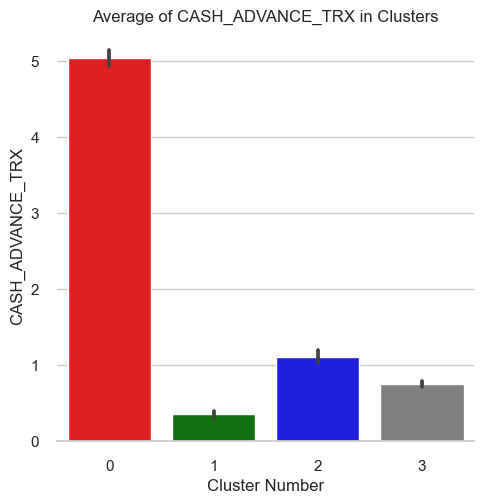

In [89]:
sns.set_theme(style="whitegrid")
g = sns.catplot(data=imp_data,kind="bar", x="Target",y='CASH_ADVANCE_TRX', palette=['red','green','blue','gray'])
g.despine(left=True)
g.set_axis_labels("Cluster Number", "CASH_ADVANCE_TRX")
plt.title("Average of CASH_ADVANCE_TRX in Clusters")
plt.show()

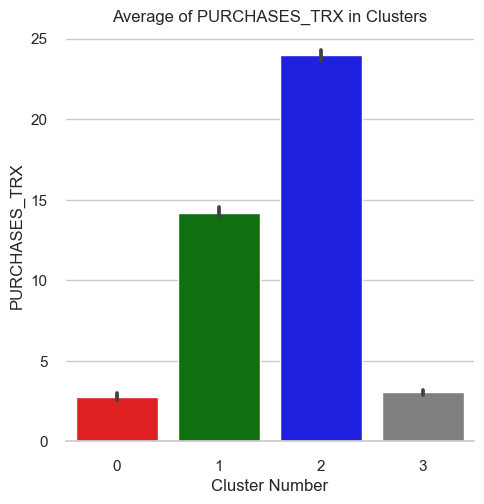

In [90]:
sns.set_theme(style="whitegrid")
g = sns.catplot(data=imp_data,kind="bar", x="Target",y='PURCHASES_TRX', palette=['red','green','blue','gray'])
g.despine(left=True)
g.set_axis_labels("Cluster Number", "PURCHASES_TRX")
plt.title("Average of PURCHASES_TRX in Clusters")
plt.show()

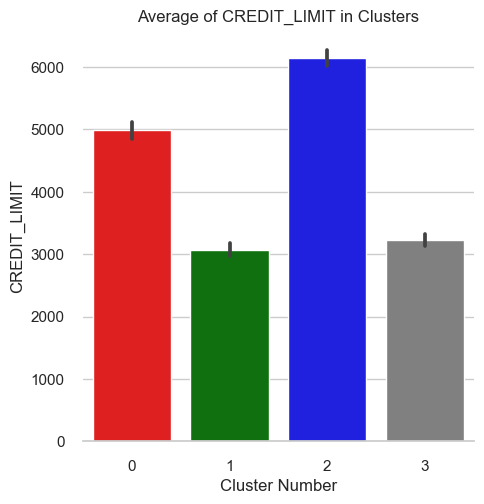

In [91]:
sns.set_theme(style="whitegrid")
g = sns.catplot(data=imp_data,kind="bar", x="Target",y='CREDIT_LIMIT', palette=['red','green','blue','gray'])
g.despine(left=True)
g.set_axis_labels("Cluster Number", "CREDIT_LIMIT")
plt.title("Average of CREDIT_LIMIT in Clusters")
plt.show()

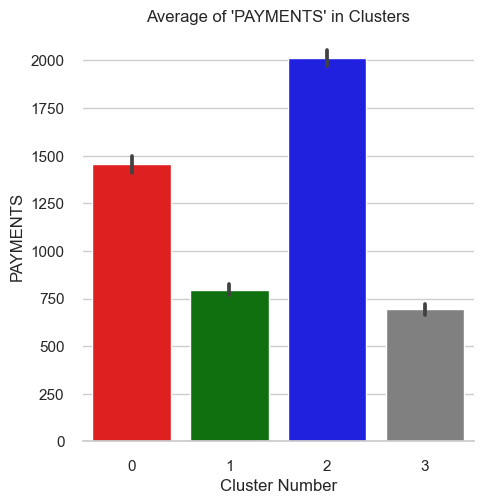

In [92]:
sns.set_theme(style="whitegrid")
g = sns.catplot(data=imp_data,kind="bar", x="Target",y='PAYMENTS', palette=['red','green','blue','gray'])
g.despine(left=True)
g.set_axis_labels("Cluster Number", 'PAYMENTS')
plt.title("Average of 'PAYMENTS' in Clusters")
plt.show()

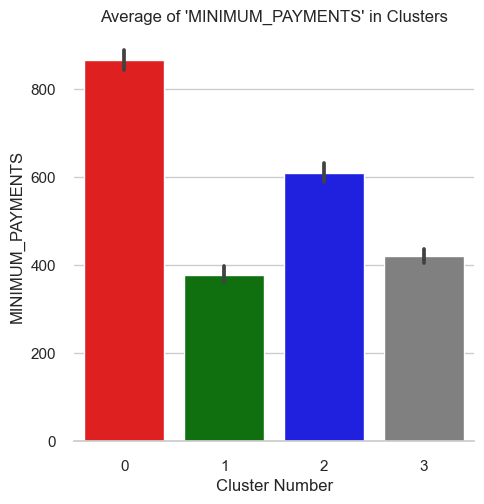

In [93]:
sns.set_theme(style="whitegrid")
g = sns.catplot(data=imp_data,kind="bar", x="Target",y='MINIMUM_PAYMENTS', palette=['red','green','blue','gray'])
g.despine(left=True)
g.set_axis_labels("Cluster Number", 'MINIMUM_PAYMENTS')
plt.title("Average of 'MINIMUM_PAYMENTS' in Clusters")
plt.show()

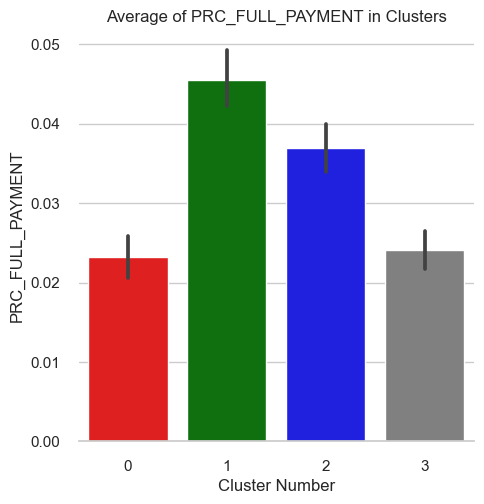

In [94]:
sns.set_theme(style="whitegrid")
g = sns.catplot(data=imp_data,kind="bar", x="Target",y='PRC_FULL_PAYMENT', palette=['red','green','blue','gray'])
g.despine(left=True)
g.set_axis_labels("Cluster Number", "PRC_FULL_PAYMENT")
plt.title("Average of PRC_FULL_PAYMENT in Clusters")
plt.show()

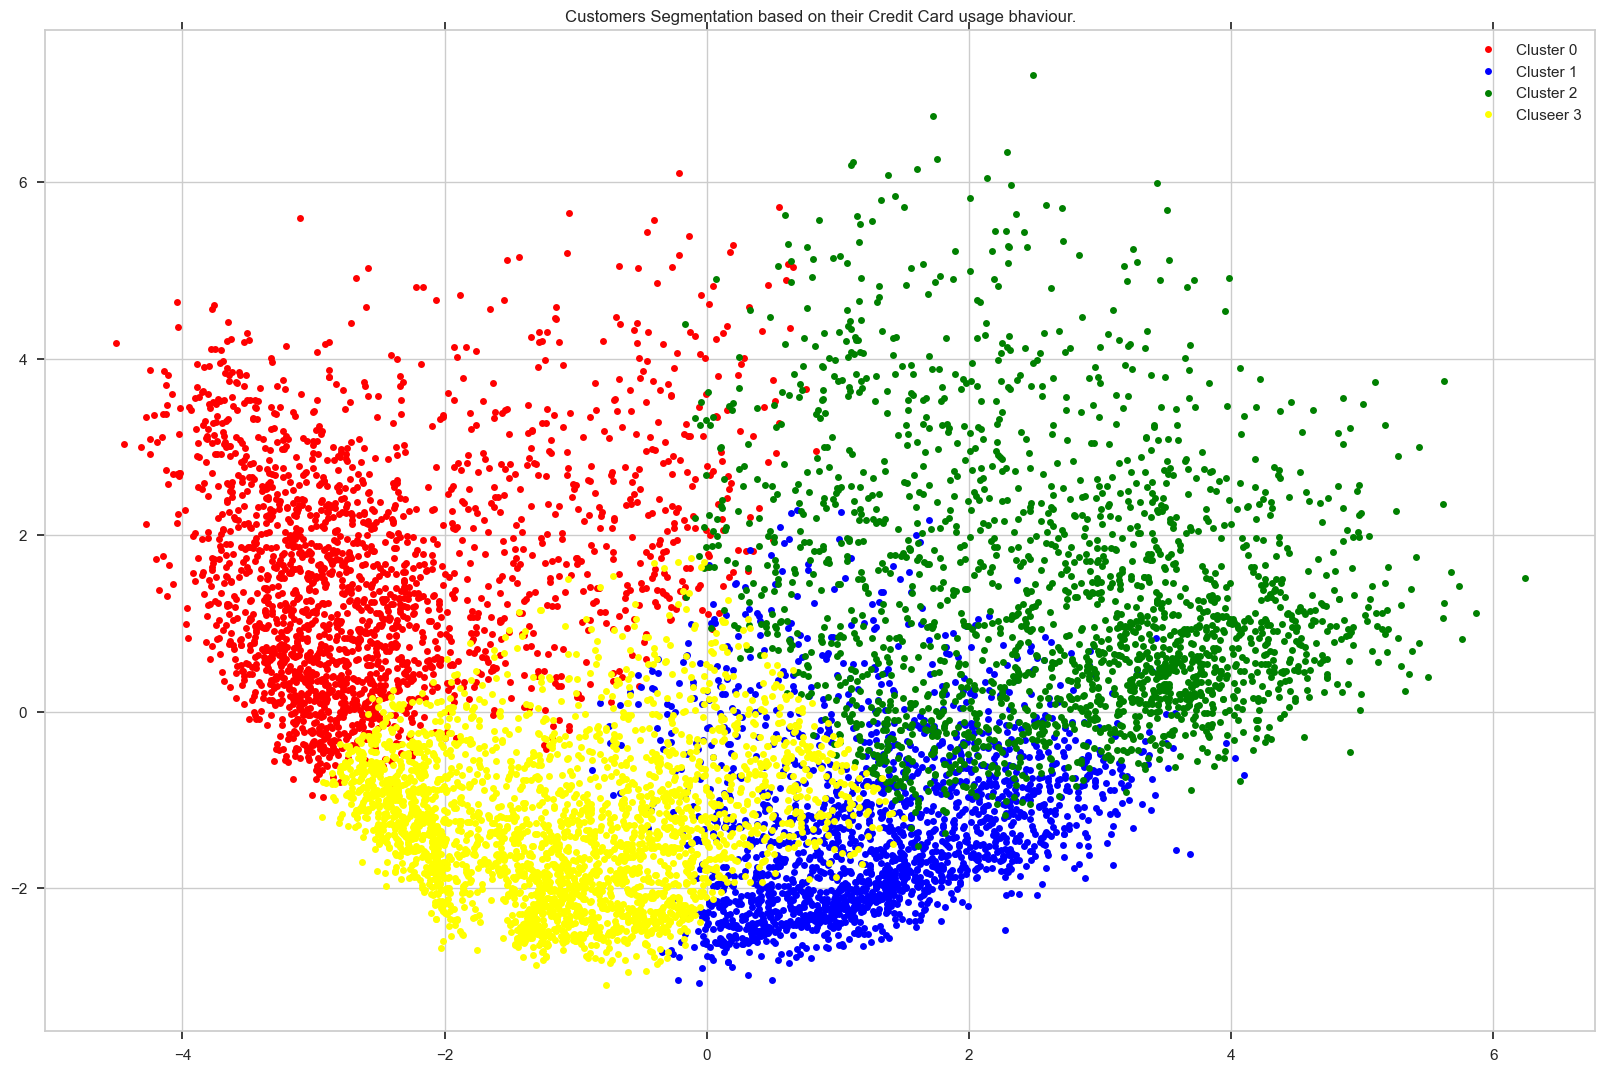

In [107]:
x, y = pca_data.iloc[:, 0], pca_data.iloc[:, 1]

colors = {0: 'red',
          1: 'blue',
          2: 'green', 
          3: 'yellow'}

names = {0: 'Cluster 0', 
         1: 'Cluster 1', 
         2: 'Cluster 2', 
         3: 'Cluseer 3',}
  
df = pd.DataFrame({'x': x, 'y':y, 'label':pca_data.iloc[:, -1]}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Customers Segmentation based on their Credit Card usage bhaviour.")
plt.show()

# Conclusion

**Class 0 is mysterious. look at them! they have highest BALANCE, but lowest PURCHASE of all! it seems they only use their fortunes when they want pay in advance (highest CASHADVANCE, CASHADVANCEFREQUENCY and CASHADVANCETRX). A cash advance is a service provided by most credit card and charge card issuers. The service allows cardholders to withdraw cash, either through an ATM or over the counter at a bank or other financial agency, up to a certain limit.**

**Class 1 : contains customers who don't make a lot of money (look at their BALANCE, it is the lowest of all) but this doen't keep them away from purchasing stuff! in terms of PURCHASES, they are the second class. how do they do this? take a closer look: they don't buy stuff in one go (they have lowest ammount of ONEOFF_PURCHASES and ONEOFF PURCHASES FREQUENCY) their key to success is instalments! It's easy: if you don't make enough money to buy stuff in one go, just pay over a period of time. (They have highest values of INSTALLMENTSPURCHASES and PURCHASESINSTALLMENTSFREQ**

**Class 2 contains customers who have a good income (second highest BALANCE) and are enjoying it! they purchase a lot (highest PURCHASESFREQUENCY), both in installments and in one-go!**

**Class 3 shows customers who are not very rich, and don't take risks. their BALANCE (amount left in their account to make purchases) is below average, and they don't purchase much. (their PURCHASES is below average as well, and their PURCHASE FREQUENCY is very low.)**